In [1]:
import sqlite3
import pandas as pd
from bdpy.dataform import SQLite3KeyValueStore
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import sem
import scipy

## Unit Correlation

In [ ]:
all_subject_data = []
for subject in subject_list:
    dirr = f'path_to_output/{subject}_evaluation.db'
    db = SQLite3KeyValueStore(dirr)
    result_list = []
    for roi in ['V1','V2','V3','V4','LOC','PPA','FFA']:
        for layer in ['conv1','conv2','conv3','conv4','conv5','fc6','fc7','fc8']:
            unit_correlation_o = db.get(layer=layer, subject=f'sub-{subject}', roi=roi, metric='unit_correlation_s')
            temp_df = pd.DataFrame({
                'ROI': [roi]* len(unit_correlation_o),
                'unit_correlation_o': unit_correlation_o,
                'Layer': [layer]* len(unit_correlation_o),
                'Subject': [subject] * len(unit_correlation_o),
            })
            result_list.append(temp_df)

    # Combine the data for this subject
    subject_layer_data = pd.concat(result_list)
    all_subject_data.append(subject_layer_data)
    
df = pd.concat(all_subject_data, ignore_index=True)

/scratch/ipykernel_3626722/1740697443.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='ROI', y='unit_correlation_o', hue='Layer', data=df, ci=None, palette='muted')


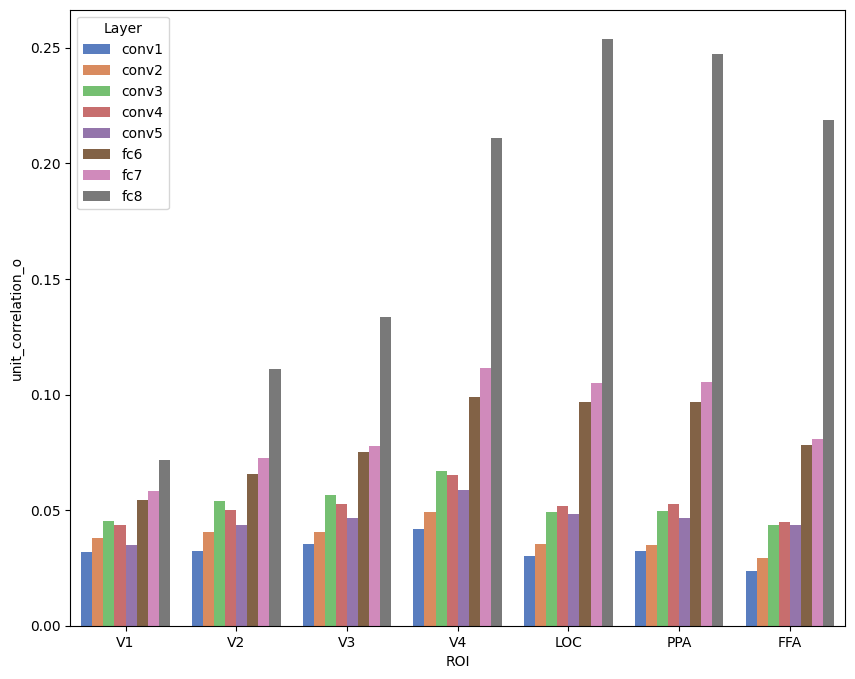

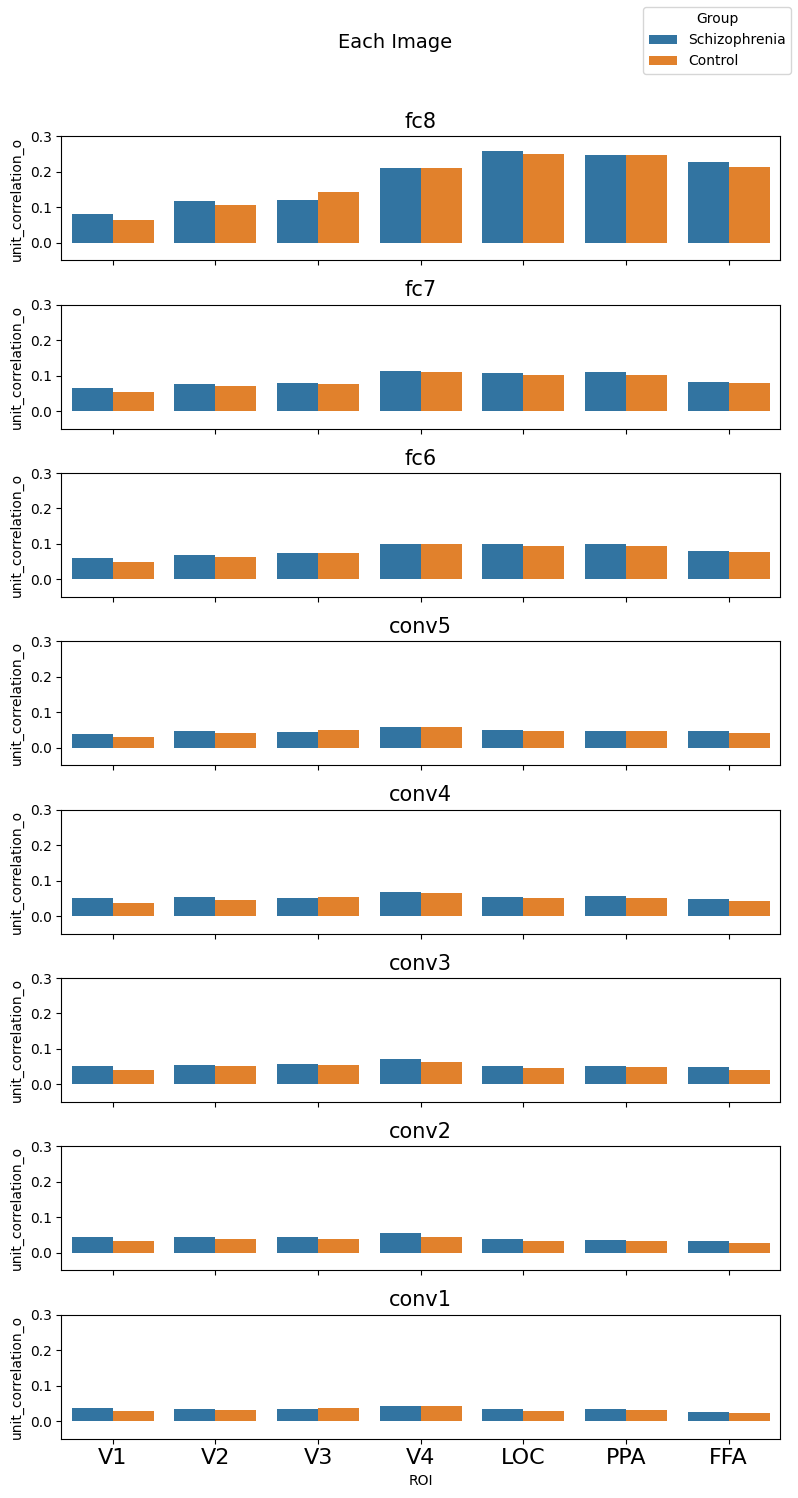

In [ ]:

plt.figure(figsize=(10, 8))
sns.barplot(x='ROI', y='unit_correlation_o', hue='Layer', data=df, ci=None, palette='muted')
plt.show()

group1_subjects = scz_group_subjects
df['Group'] = df['Subject'].apply(lambda x: 'Schizophrenia' if x in group1_subjects else 'Control')


layers = np.unique(df['Layer'])

fig, axes = plt.subplots(8, 1, figsize=(8, 15), sharex=True, sharey=True)

for i, layer in enumerate(layers[::-1]):
    layer_data = df[df['Layer'] == layer]
    
    sns.barplot(
        x='ROI', y='unit_correlation_o', hue='Group', 
        data=layer_data, ax=axes[i], errorbar=None
    )
    
    axes[i].set_title(layer, fontsize=15)
    axes[i].set_ylim(-0.05, 0.3)
    axes[i].legend([], [], frameon=False)  # Remove legend for each subplot

    plt.setp(axes[i].get_xticklabels(), fontsize=16)

# Set common labels and legend
fig.suptitle('Each Image', fontsize=14)

# Add a single legend for the entire figure
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', title='Group', fontsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Image correlaiton

In [ ]:
all_subject_data = []
for subject in subject_list:
    dirr = f'path_to_output/{subject}_evaluation.db'
    db = SQLite3KeyValueStore(dirr)
    result_list = []
    for roi in ['V1','V2','V3','V4','LOC','PPA','FFA']:
        for layer in ['conv1','conv2','conv3','conv4','conv5','fc6','fc7','fc8']:
            # same_image_correlation = db.get(layer=layer, subject=f'sub-{subject}', roi=roi, metric='same_image_correlation')
            same_image_correlation = db.get(layer=layer, subject=f'sub-{subject}', roi=roi, metric='pattern_same_original')
            blur_image_correlation = db.get(layer=layer, subject=f'sub-{subject}', roi=roi, metric='pattern_same_blur')
            temp_df = pd.DataFrame({
                'ROI': [roi]* len(same_image_correlation),
                'same_image_correlation': same_image_correlation,
                'blur_image_correlation': blur_image_correlation,
                'Layer': [layer]* len(same_image_correlation),
                'Subject': [subject] * len(same_image_correlation),
            })
            result_list.append(temp_df)

    # Combine the data for this subject
    subject_layer_data = pd.concat(result_list)
    all_subject_data.append(subject_layer_data)
    
df = pd.concat(all_subject_data, ignore_index=True)

/scratch/ipykernel_3626722/1865874963.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='ROI', y='same_image_correlation', hue='Layer', data=df, ci=None, palette='muted')


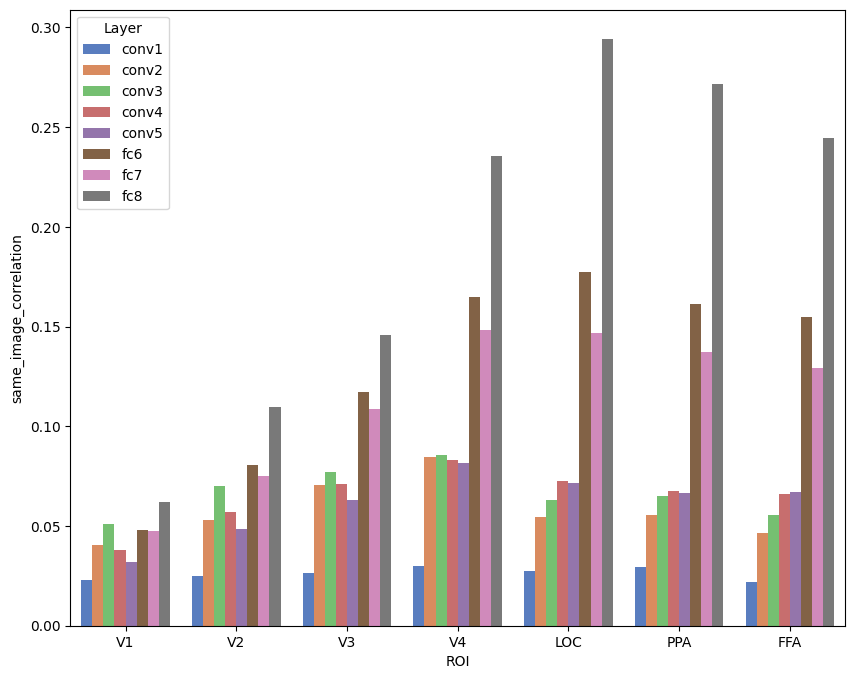

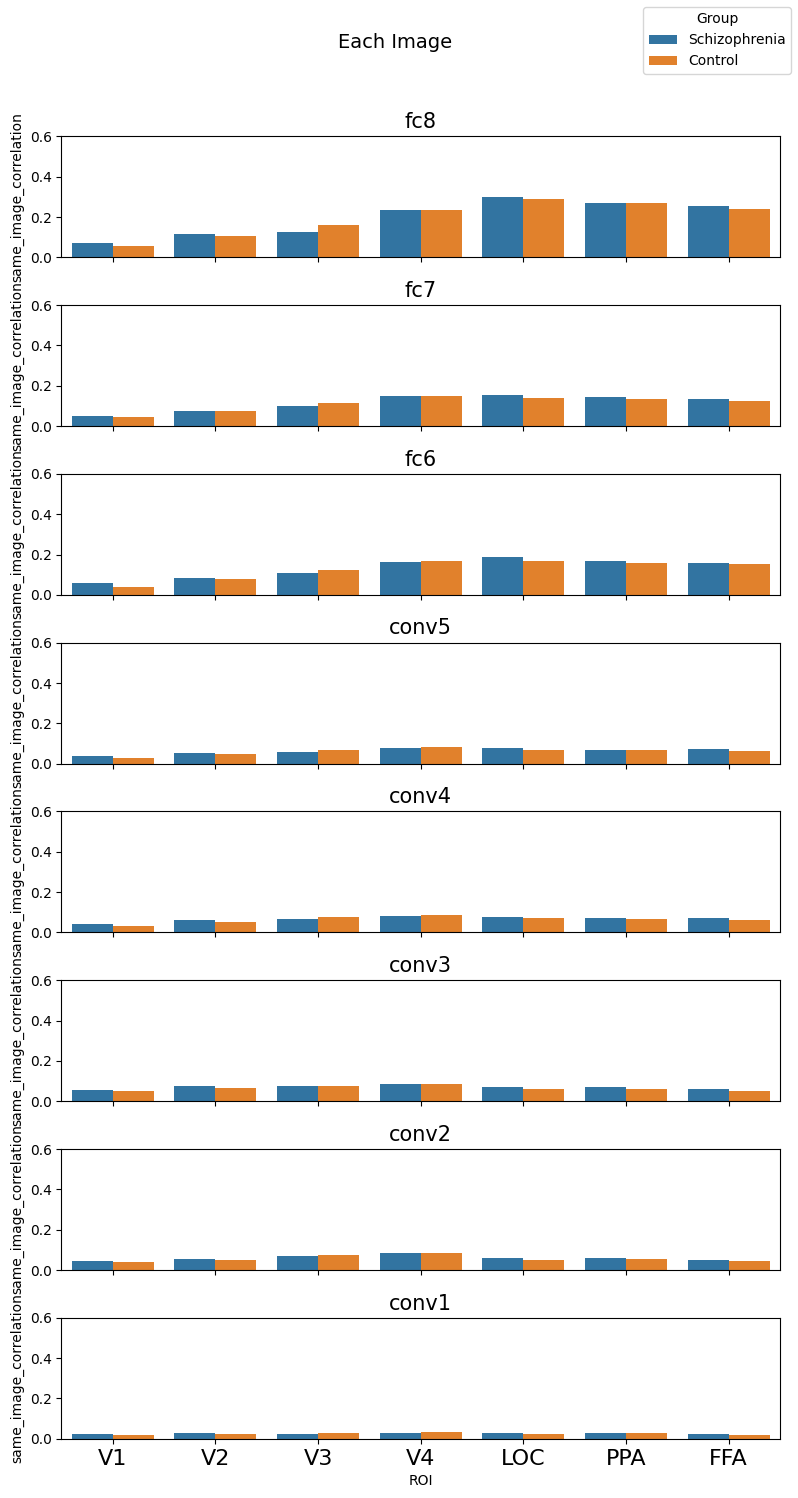

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(x='ROI', y='same_image_correlation', hue='Layer', data=df, ci=None, palette='muted')
plt.show()

group1_subjects = scz_group_subjects
df['Group'] = df['Subject'].apply(lambda x: 'Schizophrenia' if x in group1_subjects else 'Control')


layers = np.unique(df['Layer'])

fig, axes = plt.subplots(8, 1, figsize=(8, 15), sharex=True, sharey=True)

for i, layer in enumerate(layers[::-1]):
    layer_data = df[df['Layer'] == layer]
    
    sns.barplot(
        x='ROI', y='same_image_correlation', hue='Group', 
        data=layer_data, ax=axes[i], errorbar=None
    )
    
    axes[i].set_title(layer, fontsize=15)
    axes[i].set_ylim(0, 0.6)
    axes[i].legend([], [], frameon=False)  # Remove legend for each subplot

    plt.setp(axes[i].get_xticklabels(), fontsize=16)

# Set common labels and legend
fig.suptitle('Each Image', fontsize=14)

# Add a single legend for the entire figure
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', title='Group', fontsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

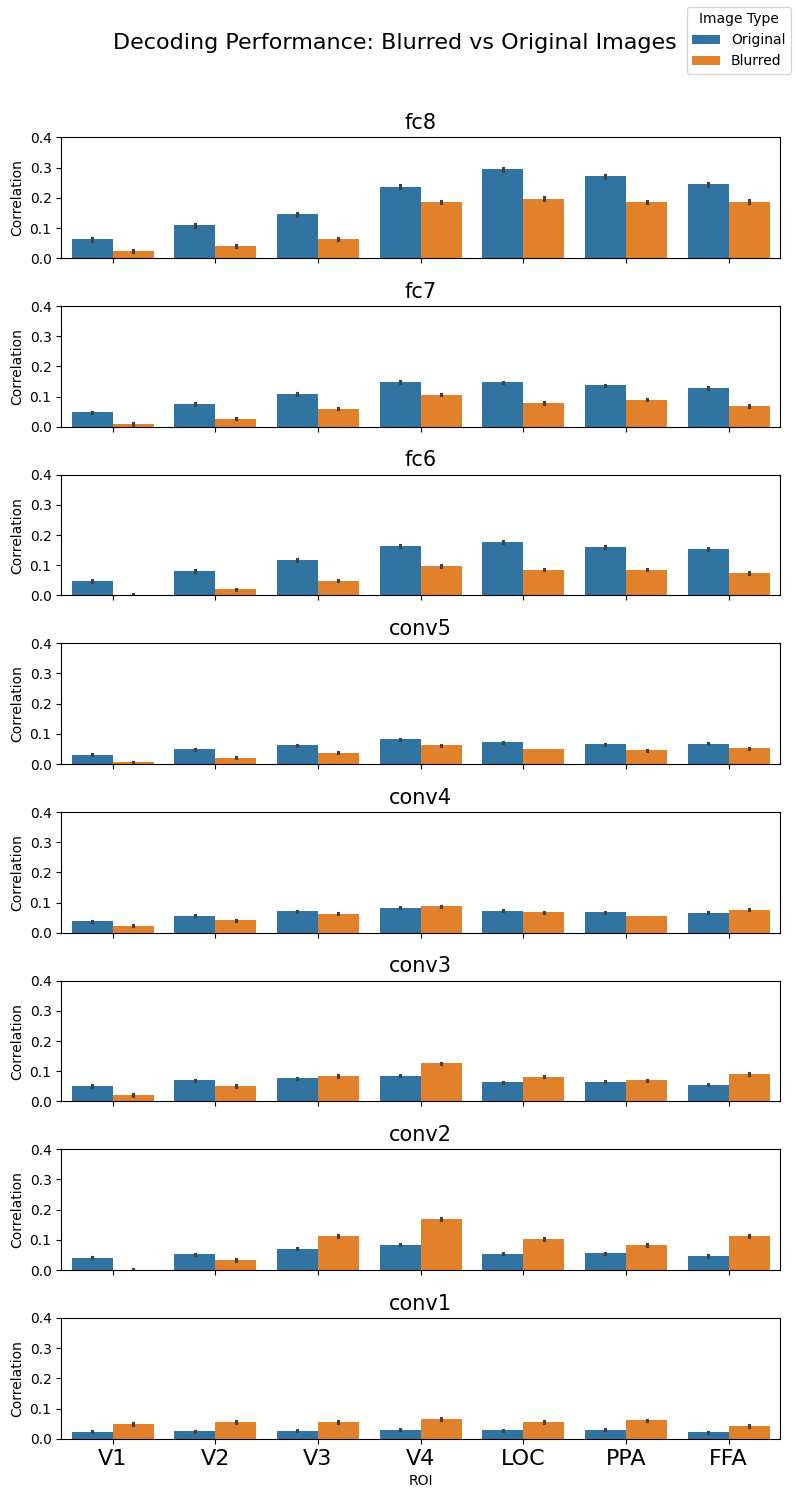

In [6]:
df_long = pd.melt(
    df,
    id_vars=['ROI', 'Layer', 'Subject'],
    value_vars=['same_image_correlation', 'blur_image_correlation'],
    var_name='ImageType',
    value_name='Correlation'
)
df_long['ImageType'] = df_long['ImageType'].map({
    'same_image_correlation': 'Original',
    'blur_image_correlation': 'Blurred'
})

fig, axes = plt.subplots(8, 1, figsize=(8, 15), sharex=True, sharey=True)

for i, layer in enumerate(layers[::-1]):
    layer_data = df_long[df_long['Layer'] == layer]
    
    sns.barplot(
        x='ROI', y='Correlation', hue='ImageType',
        data=layer_data, ax=axes[i], errorbar='se'
    )
    
    axes[i].set_title(layer, fontsize=15)
    axes[i].set_ylim(0, 0.4)
    axes[i].legend([], [], frameon=False)
    plt.setp(axes[i].get_xticklabels(), fontsize=16)

# Set figure-wide title and legend
fig.suptitle('Decoding Performance: Blurred vs Original Images', fontsize=16)
plt.subplots_adjust(top=0.95, right=0.85)


handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', title='Image Type', fontsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Content Specificity

In [7]:
from bdpy.dataform import Features
import sys
from bdpy.pipeline.config import init_hydra_cfg
from hydra.core.global_hydra import GlobalHydra
GlobalHydra.instance().clear()
sys.argv = ['notebook', 'config/deco_alexnet.yaml']
cfg = init_hydra_cfg()
feature_index_file = cfg.decoder.features.get("index_file", None)
test_features = '/flash/DoyaU/shuhei/bdata_decoding/features_test_norm'
features_test = Features(test_features, feature_index=feature_index_file)
image_labels = features_test.labels
# true_labels

/home/s/shuhei-hara1/.local/lib/python3.11/site-packages/hydra/experimental/initialize.py:116: UserWarning: hydra.experimental.initialize_config_dir() is no longer experimental. Use hydra.initialize_config_dir().
  deprecation_warning(message=message)
/home/s/shuhei-hara1/.local/lib/python3.11/site-packages/hydra/experimental/initialize.py:118: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  self.delegate = real_initialize_config_dir(
/home/s/shuhei-hara1/.local/lib/python3.11/site-packages/hydra/experimental/compose.py:25: UserWarning: hydra.experimental.compose() is no longer experimental. Use hydra.compose()
  deprecation_warning(message=message)


In [ ]:
all_subject_data = []
for subject in subject_list:
    dirr_test = f'path_to_output/{subject}_evaluation.db'
    db_test = SQLite3KeyValueStore(dirr_test)
    result_list = []
    for roi in ['V1','V2','V3','V4','LOC','PPA','FFA']:
        for layer in ['conv1','conv2','conv3','conv4','conv5','fc6','fc7','fc8']:
            correlation_nonblulr = db_test.get(layer=layer, subject=f'sub-{subject}', roi=roi, metric='pattern_same_original')
            correlation_blur = db_test.get(layer=layer, subject=f'sub-{subject}', roi=roi, metric='pattern_same_blur')
            correlation_diff_nonblur = db_test.get(layer=layer, subject=f'sub-{subject}', roi=roi, metric='pattern_diff_original')
            correlation_diff_blur = db_test.get(layer=layer, subject=f'sub-{subject}', roi=roi, metric='pattern_diff_blur')
            correlation_base = db_test.get(layer=layer, subject=f'sub-{subject}', roi=roi, metric='true_feature_correlation')
            temp_df = pd.DataFrame({
                'ROI': [roi]* len(correlation_nonblulr),
                'correlation_nonblur': correlation_nonblulr,
                'correlation_blur': correlation_blur,
                'correlation_diff_nonblur': correlation_diff_nonblur,
                'correlation_diff_blur': correlation_diff_blur,
                'correlation_base': correlation_base,
                'Feature Gain': correlation_nonblulr - correlation_blur,
                'Layer': [layer]* len(correlation_nonblulr),
                'Subject': [subject] * len(correlation_nonblulr),
                'Image': image_labels
            })
            result_list.append(temp_df)

    # Combine the data for this subject
    subject_layer_data = pd.concat(result_list)
    all_subject_data.append(subject_layer_data)
    # break
    
df = pd.concat(all_subject_data, ignore_index=True)
group1_subjects = ['DI', 'TT', 'HM', 'RM', 'KH', 'MF', 'FA', 'MOt', 'KT', 'SY', 'TY']
df['Group'] = df['Subject'].apply(lambda x: 'Schizophrenia' if x in group1_subjects else 'Control')

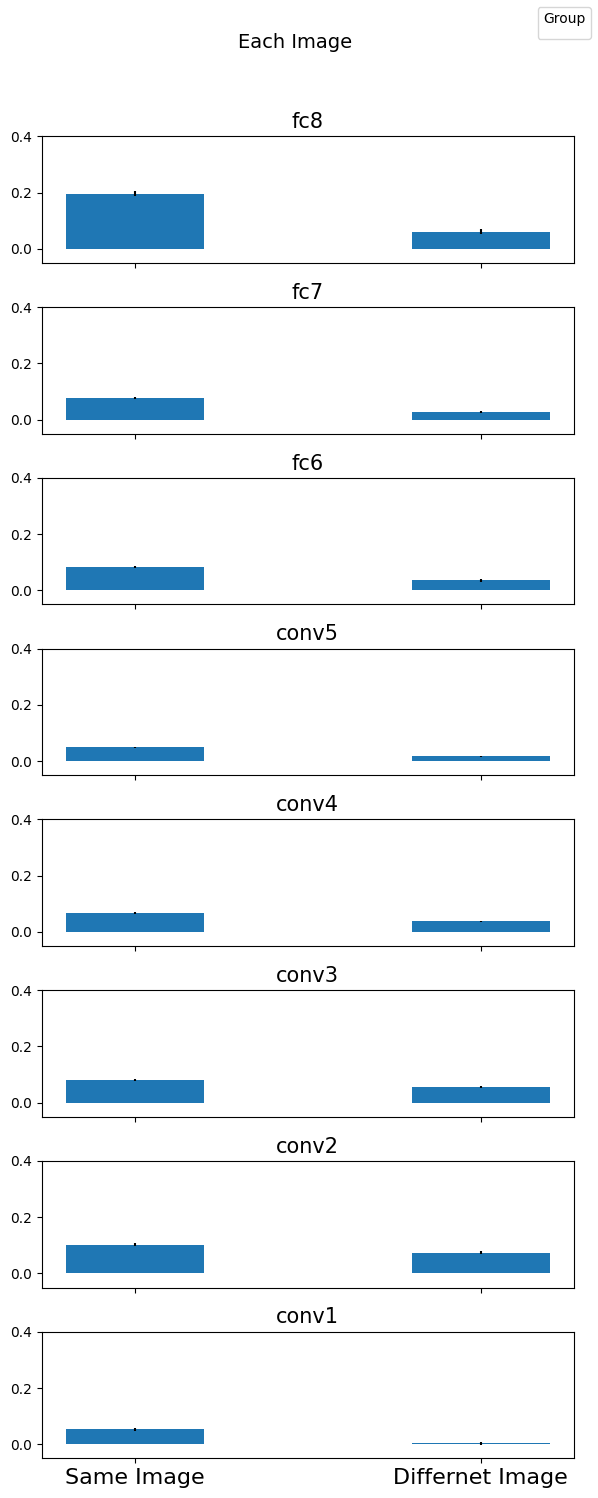

In [ ]:

layers = np.unique(df['Layer'])
fig, axes = plt.subplots(8, 1, figsize=(6, 15), sharex=True, sharey=True)

for i, layer in enumerate(layers[::-1]):
    layer_data = df[df['Layer'] == layer]
    layer_data = layer_data[layer_data['ROI']=='LOC']
    
    mean_blur = np.mean(layer_data['correlation_blur'])
    ci95_blur = 1.96 * sem(layer_data['correlation_blur'])

    mean_random = np.mean(layer_data['correlation_diff_blur'])
    ci95_random = 1.96 * sem(layer_data['correlation_diff_blur'])
    
    axes[i].bar(['Same Image', 'Differnet Image'], [mean_blur, mean_random], yerr=[ci95_blur, ci95_random], width=0.4)
    
    axes[i].set_title(layer, fontsize=15)
    axes[i].set_ylim(-0.05, 0.4)
    axes[i].legend([], [], frameon=False)  # Remove legend for each subplot

    plt.setp(axes[i].get_xticklabels(), fontsize=16)

# Set common labels and legend
fig.suptitle('Each Image', fontsize=14)

# Add a single legend for the entire figure
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', title='Group', fontsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Feature Gain

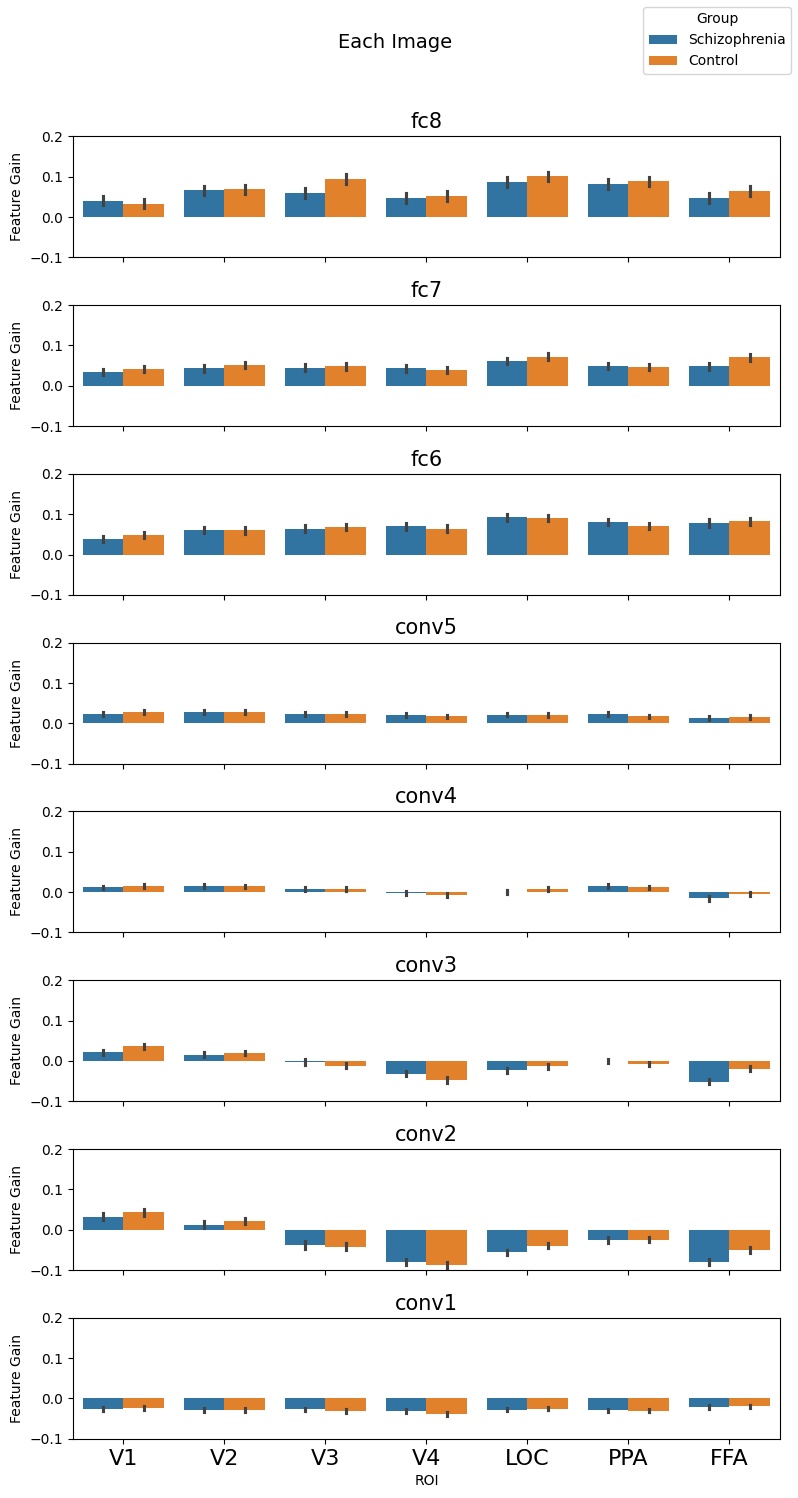

In [10]:
layers = np.unique(df['Layer'])

fig, axes = plt.subplots(8, 1, figsize=(8, 15), sharex=True, sharey=True)

for i, layer in enumerate(layers[::-1]):
    layer_data = df[df['Layer'] == layer]
    
    sns.barplot(
        x='ROI', y='Feature Gain', hue='Group', 
        data=layer_data, ax=axes[i], #errorbar=None
    )
    
    axes[i].set_title(layer, fontsize=15)
    axes[i].set_ylim(-0.1, 0.2)
    axes[i].legend([], [], frameon=False)  # Remove legend for each subplot

    plt.setp(axes[i].get_xticklabels(), fontsize=16)

# Set common labels and legend
fig.suptitle('Each Image', fontsize=14)

# Add a single legend for the entire figure
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', title='Group', fontsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()